# Import libraries

In [42]:
# Import libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/food-delivery/FoodDelivery_Saudi_2022-2025.csv
/kaggle/input/food-delivery/saudi_cities_geocoding.csv


# Load & Explore Data

In [43]:
#Download and Read the csv file
df = pd.read_csv('/kaggle/input/food-delivery/FoodDelivery_Saudi_2022-2025.csv', sep=',')

In [44]:
df.head()

,Order Number,Order Date and Time,Order_City,Restaurant Type,Total Bill (in Saudi Riyals),Delivery Duration (in minutes),Customer Rating (from 1 to 5 stars)
0,203,1/18/2025 12:17,Jeddah,Sweets,252.73,15,3
1,204,5/12/2023 19:40,Buraidah,Barbecue,535.70,7,4
2,205,5/10/2023 7:47,Hail,Coffee,395.11,14,4
3,206,4/3/2023 23:39,Abha,Fast Food,698.11,5,5
4,207,12/21/2024 13:30,Buraidah,Coffee,499.87,8,5


In [45]:
# Get the shape of the DataFrame
df.shape

(10000, 7)

In [46]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Order Number                         10000 non-null  int64  
 1   Order Date and Time                  10000 non-null  object 
 2   Order_City                           10000 non-null  object 
 3   Restaurant Type                      10000 non-null  object 
 4   Total Bill (in Saudi Riyals)         10000 non-null  float64
 5   Delivery Duration (in minutes)       10000 non-null  int64  
 6   Customer Rating (from 1 to 5 stars)  10000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB


In [47]:
df.describe()

,Order Number,Total Bill (in Saudi Riyals),Delivery Duration (in minutes),Customer Rating (from 1 to 5 stars)
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5202.50000,423.664271,11.946700,2.991300
std,2886.89568,222.786720,4.625754,1.219333
min,203.00000,36.040000,4.000000,1.000000
25%,2702.75000,232.060000,8.000000,2.000000
50%,5202.50000,428.385000,12.000000,3.000000
75%,7702.25000,616.887500,16.000000,4.000000
max,10202.00000,799.980000,20.000000,5.000000


# Clean Data

In [48]:
# Duplicate rows
df.duplicated().sum()

0

In [49]:
df.isnull().sum()

Order Number                           0
Order Date and Time                    0
Order_City                             0
Restaurant Type                        0
Total Bill (in Saudi Riyals)           0
Delivery Duration (in minutes)         0
Customer Rating (from 1 to 5 stars)    0
dtype: int64

In [50]:
# Convert Order Date and Time column to datetime
df["Order Date and Time"] = pd.to_datetime(df["Order Date and Time"])

# Analysis and Data Visualization

# Time-Based Analysis

In [51]:
# Peak Ordering Hours
Ordering_Hours = df.groupby(df["Order Date and Time"].dt.hour)["Order Number"].count()
Ordering_Hours

Order Date and Time
0     427
1     406
2     403
3     407
4     412
5     428
6     429
7     421
8     416
9     416
10    414
11    389
12    427
13    380
14    439
15    425
16    360
17    445
18    443
19    424
20    436
21    407
22    411
23    435
Name: Order Number, dtype: int64

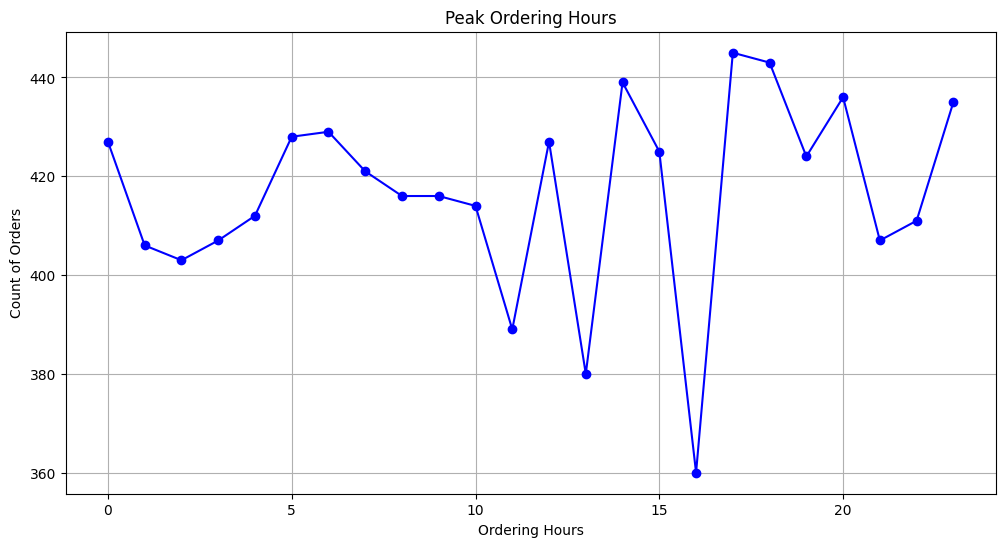

In [52]:
# Plot Peak Ordering Hours
plt.figure(figsize=(12,6))
Ordering_Hours.plot(kind="line", marker="o", color="b")
plt.title("Peak Ordering Hours")
plt.xlabel("Ordering Hours")
plt.ylabel("Count of Orders")
plt.grid()
plt.show()

In [53]:
# Aggregate sales per year
yearly_Sales = df.groupby(df["Order Date and Time"].dt.year)["Total Bill (in Saudi Riyals)"].sum()
yearly_Sales

Order Date and Time
2022    1345205.33
2023    1356931.27
2024    1413039.09
2025     121467.02
Name: Total Bill (in Saudi Riyals), dtype: float64

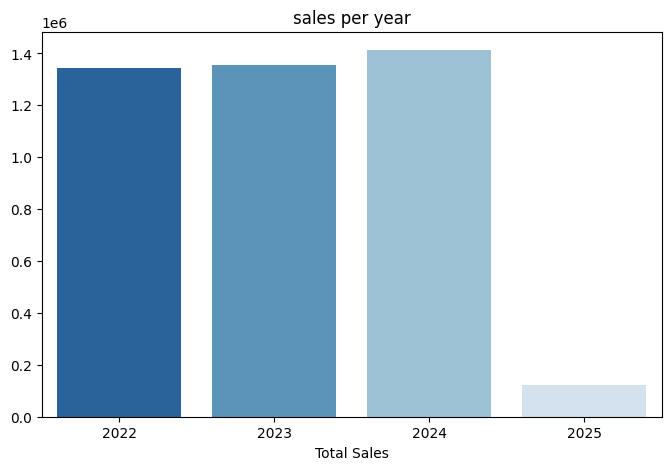

In [54]:
# Plot sales per year
plt.figure(figsize=(8,5))
sns.barplot(x=yearly_Sales.index, y=yearly_Sales.values, palette="Blues_r")
plt.title("sales per year")
plt.xlabel("Total Sales")
plt.show()

In [55]:
#months have the highest and lowest orders
months_odrers = df.groupby(df["Order Date and Time"].dt.month)["Order Number"].count()
months_odrers

Order Date and Time
1     1127
2      715
3      803
4      770
5      864
6      740
7      805
8      877
9      817
10     864
11     779
12     839
Name: Order Number, dtype: int64

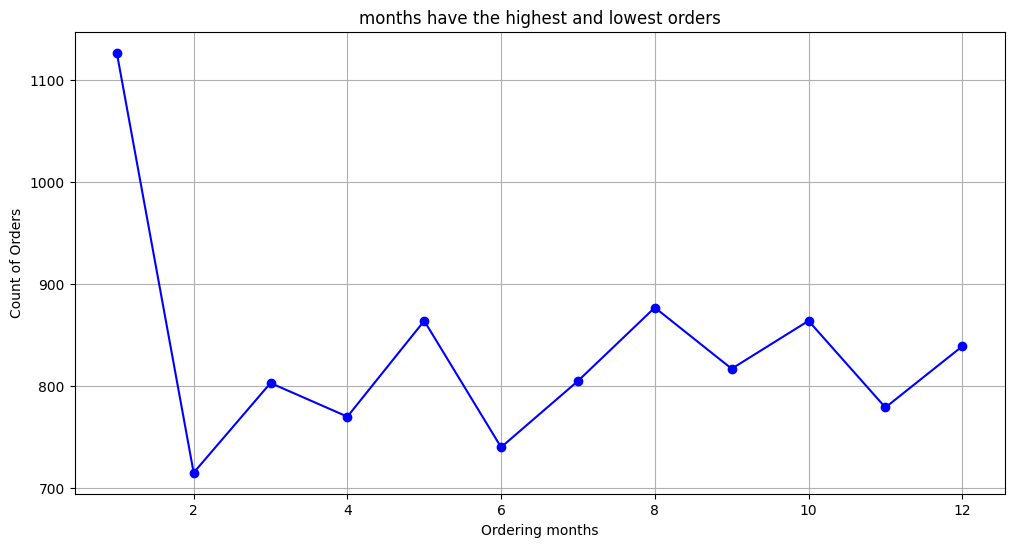

In [56]:
# Plot 
plt.figure(figsize=(12,6))
months_odrers.plot(kind="line", marker="o", color="b")
plt.title("months have the highest and lowest orders")
plt.xlabel("Ordering months")
plt.ylabel("Count of Orders")
plt.grid()
plt.show()

In [57]:
#Weekday have the highest and lowest orders (weekday (Monday = 0, Sunday = 6))
Weekday_odrers = df.groupby(df["Order Date and Time"].dt.weekday)["Order Number"].count()
Weekday_odrers

Order Date and Time
0    1402
1    1388
2    1444
3    1414
4    1434
5    1415
6    1503
Name: Order Number, dtype: int64

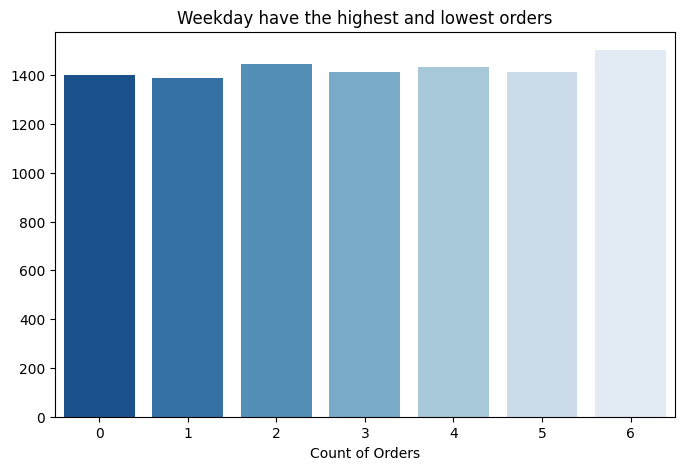

In [58]:
# Plot Weekday have the highest and lowest orders
plt.figure(figsize=(8,5))
sns.barplot(x=Weekday_odrers.index, y=Weekday_odrers.values, palette="Blues_r")
plt.title("Weekday have the highest and lowest orders")
plt.xlabel("Count of Orders")
plt.show()

In [59]:
#days have the highest and lowest orders
days_odrers = df.groupby(df["Order Date and Time"].dt.day)["Order Number"].count()
days_odrers

Order Date and Time
1     340
2     372
3     332
4     322
5     339
6     322
7     342
8     326
9     361
10    309
11    320
12    316
13    317
14    340
15    314
16    305
17    341
18    316
19    307
20    320
21    336
22    306
23    328
24    320
25    325
26    324
27    373
28    323
29    269
30    315
31    220
Name: Order Number, dtype: int64

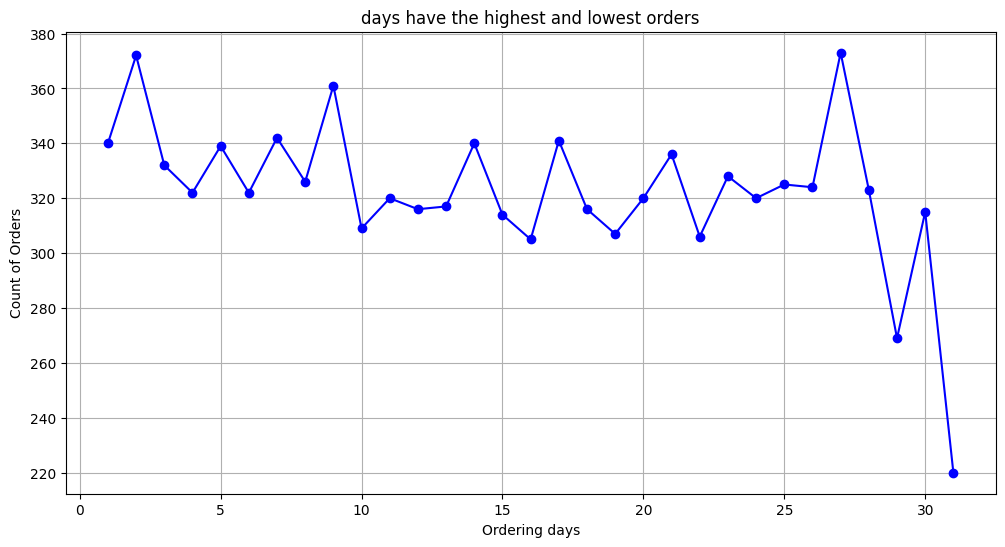

In [60]:
# Plot 
plt.figure(figsize=(12,6))
days_odrers.plot(kind="line", marker="o", color="b")
plt.title("days have the highest and lowest orders")
plt.xlabel("Ordering days")
plt.ylabel("Count of Orders")
plt.grid()
plt.show()

# Geographic Analysis (Order_City)

In [61]:
#Top Cities for Food Delivery By total bill
Top_Cities = df.groupby(['Order_City'])['Total Bill (in Saudi Riyals)'].sum().sort_values(ascending=False)
Top_Cities

Order_City
Dammam      440092.51
Buraidah    437993.82
Mecca       432633.43
Hail        431065.46
Jeddah      424691.04
Abha        424532.71
Medina      422820.70
Tabuk       422720.28
Riyadh      401468.15
Khobar      398624.61
Name: Total Bill (in Saudi Riyals), dtype: float64

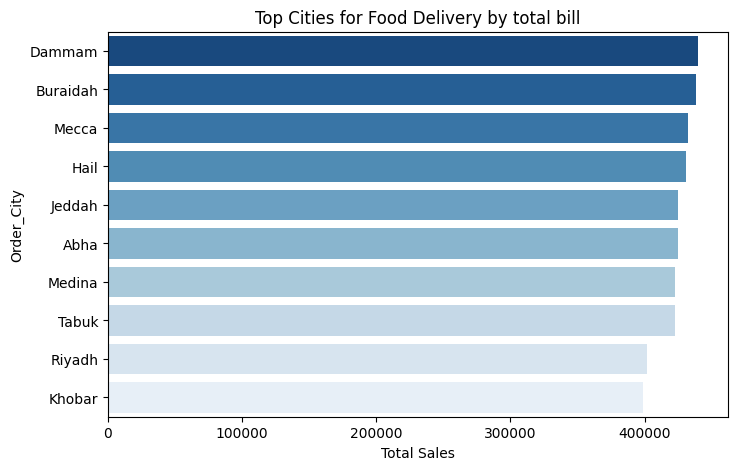

In [62]:
#plot Top Cities for Food Delivery
plt.figure(figsize=(8,5))
sns.barplot(x=Top_Cities.values, y=Top_Cities.index, palette="Blues_r")
plt.title("Top Cities for Food Delivery by total bill")
plt.xlabel("Total Sales")
plt.show()

In [63]:
#Top Cities for Food Delivery By Number of Orders
Top_Cities2 = df.groupby(['Order_City'])['Order Number'].count().sort_values(ascending=False)
Top_Cities2

Order_City
Dammam      1043
Buraidah    1025
Jeddah      1023
Tabuk       1022
Hail        1001
Mecca       1001
Abha         997
Medina       990
Riyadh       958
Khobar       940
Name: Order Number, dtype: int64

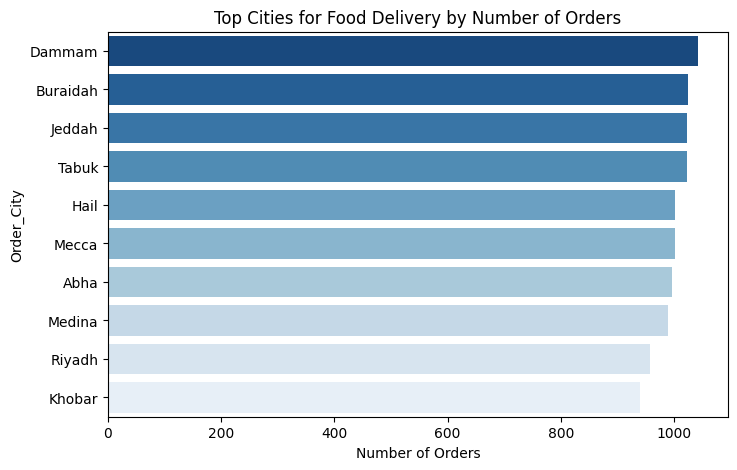

In [64]:
#plot Top Cities for Food Delivery by Number of Orders
plt.figure(figsize=(8,5))
sns.barplot(x=Top_Cities2.values, y=Top_Cities2.index, palette="Blues_r")
plt.title("Top Cities for Food Delivery by Number of Orders")
plt.xlabel("Number of Orders")
plt.show()

In [65]:
#Regional Preferences:restaurant type preferences across different cities
# Count the number of orders for each restaurant type in each city
restaurant_counts = df.groupby(['Order_City', 'Restaurant Type']).size().reset_index(name='Number of Orders')

print(restaurant_counts)

    Order_City   Restaurant Type  Number of Orders
0         Abha          Bakeries                80
1         Abha          Barbecue                75
2         Abha            Burger                81
3         Abha            Coffee                80
4         Abha         Fast Food                83
..         ...               ...               ...
115      Tabuk          Pizzeria                90
116      Tabuk           Seafood                99
117      Tabuk             Sushi                83
118      Tabuk            Sweets                79
119      Tabuk  Vegetarian/Vegan                95

[120 rows x 3 columns]


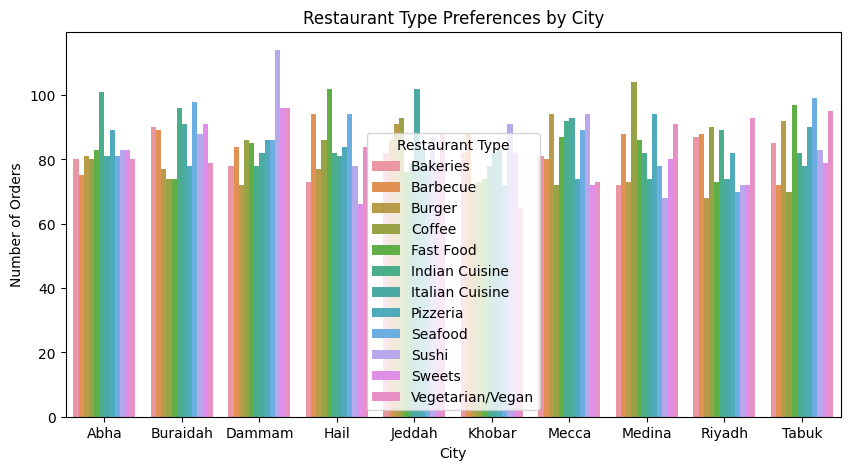

In [67]:
#plot Regional Preferences:restaurant type preferences across different cities
# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(data=restaurant_counts, x='Order_City', y='Number of Orders', hue='Restaurant Type')

# Labels & title
plt.xlabel("City")
plt.ylabel("Number of Orders")
plt.title("Restaurant Type Preferences by City")
plt.xticks()
plt.legend(title="Restaurant Type")

plt.show()

In [68]:
#the most ordered restaurant type in each city
top_restaurant_per_city = restaurant_counts.loc[restaurant_counts.groupby('Order_City')['Number of Orders'].idxmax()]

print(top_restaurant_per_city)


    Order_City   Restaurant Type  Number of Orders
5         Abha    Indian Cuisine               101
20    Buraidah           Seafood                98
33      Dammam             Sushi               114
40        Hail         Fast Food               102
54      Jeddah   Italian Cuisine               102
69      Khobar             Sushi                91
74       Mecca            Burger                94
87      Medina            Coffee               104
107     Riyadh  Vegetarian/Vegan                93
116      Tabuk           Seafood                99


# Restaurant Type & Customer Preferences

In [69]:
#Popular Restaurant Categories
Popular_restaurant_Categories = df.groupby(['Restaurant Type'])['Order Number'].count().sort_values(ascending=False)

print(Popular_restaurant_Categories )

Restaurant Type
Indian Cuisine      859
Sushi               858
Seafood             845
Barbecue            844
Vegetarian/Vegan    844
Pizzeria            843
Italian Cuisine     838
Fast Food           837
Coffee              828
Bakeries            810
Sweets              799
Burger              795
Name: Order Number, dtype: int64


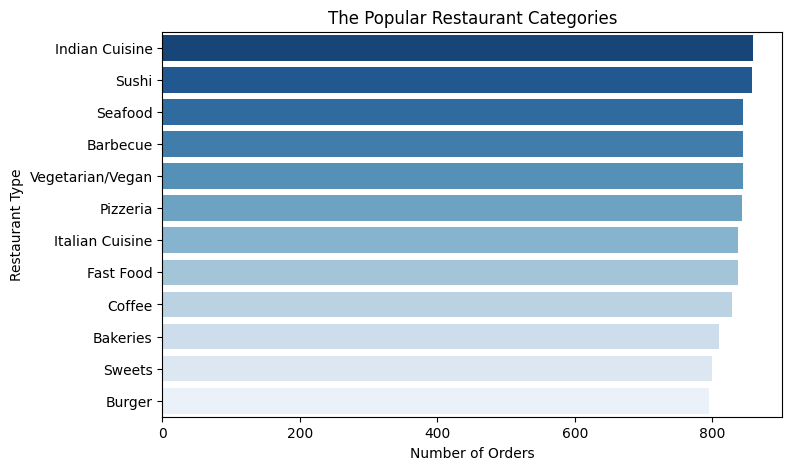

In [70]:
#plot
plt.figure(figsize=(8,5))
sns.barplot(x=Popular_restaurant_Categories.values, y=Popular_restaurant_Categories.index, palette="Blues_r")
plt.title("The Popular Restaurant Categories")
plt.xlabel("Number of Orders")
plt.show()

In [71]:
#Restaurant Type vs. Customer Ratings
#average Rating for each Restaurant Type
restaurant_type_rating = df.groupby(['Restaurant Type'])['Customer Rating (from 1 to 5 stars)'].mean().sort_values(ascending=False)
restaurant_type_rating

Restaurant Type
Fast Food           3.031063
Burger              3.028931
Seafood             3.021302
Sweets              3.020025
Bakeries            3.016049
Barbecue            2.997630
Sushi               2.996503
Italian Cuisine     2.974940
Pizzeria            2.964413
Coffee              2.954106
Vegetarian/Vegan    2.950237
Indian Cuisine      2.945285
Name: Customer Rating (from 1 to 5 stars), dtype: float64

In [72]:
#Restaurant Type vs. Delivery Duration
#average Delivery Duration for each Restaurant Type
restaurant_type_Delivery_Duration = df.groupby(['Restaurant Type'])['Delivery Duration (in minutes)'].mean().sort_values(ascending=False)
restaurant_type_Delivery_Duration

Restaurant Type
Coffee              12.132850
Vegetarian/Vegan    12.131517
Sushi               12.100233
Italian Cuisine     12.083532
Bakeries            11.980247
Pizzeria            11.978648
Barbecue            11.976303
Burger              11.918239
Indian Cuisine      11.880093
Seafood             11.835503
Fast Food           11.667861
Sweets              11.660826
Name: Delivery Duration (in minutes), dtype: float64

In [73]:
#Restaurant Type vs. average bill
#average bill for each Restaurant Type
restaurant_type_avg_bill = df.groupby(['Restaurant Type'])['Total Bill (in Saudi Riyals)'].mean().sort_values(ascending=False)
restaurant_type_avg_bill

Restaurant Type
Vegetarian/Vegan    438.027417
Bakeries            437.364778
Indian Cuisine      430.289371
Pizzeria            427.713084
Italian Cuisine     425.992876
Barbecue            425.507251
Sweets              422.627209
Fast Food           421.160442
Sushi               420.793986
Burger              413.666893
Coffee              411.898116
Seafood             408.571314
Name: Total Bill (in Saudi Riyals), dtype: float64

**correlation analysis**

<Axes: xlabel='Customer Rating (from 1 to 5 stars)', ylabel='Delivery Duration (in minutes)'>

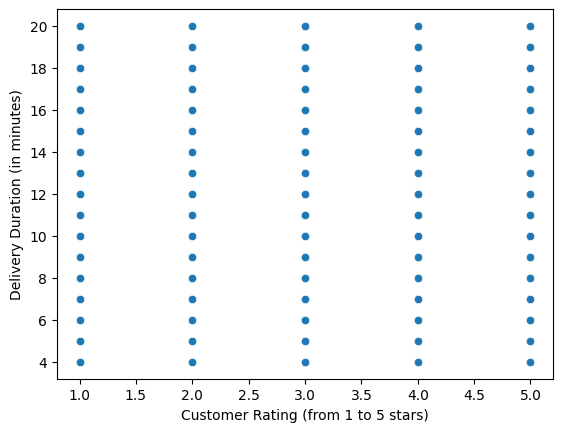

In [74]:
#correlation analysis between customer rating & Delivery duration
sns.scatterplot(data=df, x="Customer Rating (from 1 to 5 stars)", y="Delivery Duration (in minutes)")

# Financial Analysis (Total Bill in SAR)

In [75]:
#Average Order Value
avg_Order_Value = df['Total Bill (in Saudi Riyals)'].mean()
print(f"Average Order Value :{avg_Order_Value}")

Average Order Value :423.664271


In [76]:
#Customer Spending Patterns
#high-spending vs. low-spending 
min_Order_Value = df['Total Bill (in Saudi Riyals)'].min()
print(f"low-spending :{min_Order_Value}")
max_Order_Value = df['Total Bill (in Saudi Riyals)'].max()
print(f"high-spending :{max_Order_Value}")

low-spending :36.04
high-spending :799.98


<Axes: xlabel='Customer Rating (from 1 to 5 stars)', ylabel='Total Bill (in Saudi Riyals)'>

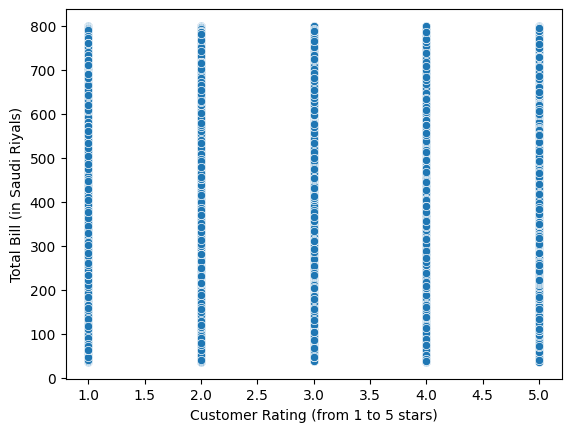

In [77]:
#correlation analysis between customer rating & Order Value
sns.scatterplot(data=df, x="Customer Rating (from 1 to 5 stars)", y="Total Bill (in Saudi Riyals)")

# Delivery Performance Analysis (Delivery Duration in Minutes)

In [78]:
#Average Delivery Time
avg_Delivery_Time = df.groupby(['Order_City'])['Delivery Duration (in minutes)'].mean()
print(f"Average Delivery Time :{avg_Delivery_Time}")

Average Delivery Time :Order_City
Abha        11.901705
Buraidah    11.957073
Dammam      11.892617
Hail        11.980020
Jeddah      12.137830
Khobar      11.611702
Mecca       11.849151
Medina      12.034343
Riyadh      12.137787
Tabuk       11.951076
Name: Delivery Duration (in minutes), dtype: float64
